<a href="https://colab.research.google.com/github/Pariskimhj/Program/blob/master/kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [ Column 별 의미 ]

PassengerId	승객 1번~891번(891명)

Survived : 0 = 사망, 1 = 생존

Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석

Name : 이름

Sex : male = 남성, female = 여성

Age : 나이

SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수

Parch : 타이타닉 호에 동승한 부모 / 자식의 수

Ticket : 티켓 번호

Fare : 승객 요금

Cabin : 방 호수

Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

# [ 훈련 데이터, 테스트 데이터 확인 ]

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('titanic/train.csv')  # 훈련 데이터 불러오기
test = pd.read_csv('titanic/test.csv')    # 테스트 데이터 불러오기

train.head(5)  # 훈련 데이터 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [168]:
test.head(5)  # 테스트 데이터 확인

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### * test data에는 Survived가 없음

목표 : train data로 훈련시켜서 test data의 Survived 예측하기

In [169]:
train.info()  # train data 정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### * Age, Cabin, Embarked에 Nan data가 있음
(총 891개의 데이터 중 **Age와 Cabin data에 결측치가 많은 것**을 확인)

In [170]:
train.isnull().sum()  # column별 결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## < 결측치 >

Age : 177

Cabin : 687

Embarked : 2

#[ 데이터 전처리 ]
1. Name에서 유용한 정보만 추출(Title)
2. Sex의 type을 str로 변환
3. 결측치를 가진 Age, Cabin, Embarked feature에 대해 유용성 판단 후 처리

##1. Name

In [171]:
train_and_test = [train, test]  # train, test dataset 합치기 : train data와 test data을 같은 방식으로 데이터 전처리하기 위하여

### < Name에서 유용한 title 추출 >

In [172]:
for dataset in train_and_test:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

# dataset에 Title이라는 column을 생성하는데 이때 값은 Name 열에 있던 title을 추출하여 넣는다

# '([A-Za-z]+)\.'  : 정규표현식
# 대문자 A-Z로 시작하면서 소문자 a-z가 여러개이면서 마침표 .로 끝나는 것을 추출
# 예를들면, Kelly, Mr. James 에서 Mr 를 추출한다는 말

train.head(5)  # Title 열 생성

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [173]:
pd.crosstab(train['Title'], train['Sex'])  # 추출한 Title을 가진 사람을 Sex로 구분하여 출력

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


### * Mr, Miss, Mrs, Master 가 가장 많고 나머지 title은 소수

### < 동일한 의미를 가진 Title을 합치고 소수는 other로 분류 >

In [174]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer', 'Lady','Major', 'Rev', 'Sir'], 'Other')  # 소수 Title은 Other로 변환
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'], 'Miss') # Mile, Ms -> Miss 로 변환 (사전적으로 같은 의미)
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs') # Mme -> Mrs (사전적으로 같은 의미)

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() # Title 별 살아남은 확률

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


### * Mrs > Miss > Master > Other > Mr 순으로 생존률이 높았다

###< Title data를 학습하기 쉽게 str로 변경 >

In [175]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].astype(str)  # Title의 타입을 object -> str로

## 2. SEX

### < Sex data str로 변경>

In [176]:
for dataset in train_and_test:
    dataset['Sex'] = dataset['Sex'].astype(str) # Sex의 타입을 object -> str로

## 3. Age

### < Age와 생존률과의 관계 >

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


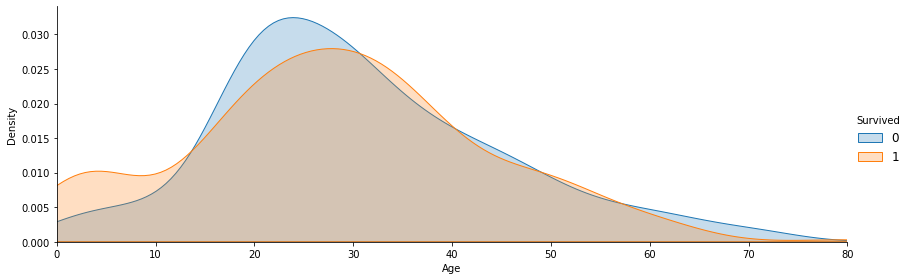

In [177]:
facet=sns.FacetGrid(train,hue="Survived",aspect=3, size=4)  # 색깔별로 Survived 유무 출력
facet.map(sns.kdeplot,'Age',shade=True)                     # Age에 대해 kdeplot 그리기(밀도 플롯)
facet.set(xlim=(0,train['Age'].max()))                      # x축에 0부터 Age 최대값까지
facet.add_legend(fontsize='large')                          # 범례 폰트 키우기

### * Age에 따른 생존 확률

약 16살까지는 생존할 확률이 더 높다

20대 중반에서 30대 초반까지는 죽을 확률이 더 높다

-> 결론 : age에 따라 생존률이 차이 나기 때문에 결측치를 채워주기로 결정

### < Age category화 >
### 1. Age를 7개 구간으로 나누기
### 2. 각 구간에 이름 붙이고 category로 분류
### 3. 각 구간별 해당하는 명 수 출력

In [178]:
for dataset in train_and_test:
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)                # Age에 있는 Nan값 median으로 처리
    dataset['Age'] = dataset['Age'].astype(int)                                 # Age type을 float -> int로 변경
print(train[['Age', 'Survived']].groupby(['Age'], as_index=False).median())     # Age별 생존 확률 출력

def get_category(age):                                                          # Age feature는 나이 구간별로 category화
    cat = ""
    if age <= -1: cat = "Unknown"
    elif age <= 5: cat = "Baby"
    elif age <= 12: cat = "Child"
    elif age <= 18: cat = "Teenager"
    elif age <= 25: cat = "Student"
    elif age <= 35: cat = "Young Adult"
    elif age <= 60: cat = "Adult"
    else : cat = "Elderly"
    return cat
train["AgeGroup"] = train["Age"].apply(lambda x : get_category(x))              # train data의 Age에 따른 AgeGroup 열 생성
test["AgeGroup"] = test["Age"].apply(lambda x : get_category(x))                # test data의 Age에 따른 AgeGroup 열 생성
train["AgeGroup"].value_counts()                                                # train data의 AgeGroup별 값 출력

    Age  Survived
0     0       1.0
1     1       1.0
2     2       0.0
3     3       1.0
4     4       1.0
..  ...       ...
66   66       0.0
67   70       0.0
68   71       0.0
69   74       0.0
70   80       1.0

[71 rows x 2 columns]


Young Adult    373
Adult          195
Student        162
Teenager        70
Baby            44
Child           25
Elderly         22
Name: AgeGroup, dtype: int64

In [179]:
print(train.isnull().sum()) # Age 결측값이 사라졌는지 확인

train.head()                # train data에 AgeGroup이 추가되었는지 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
AgeGroup         0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Mr,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Mr,Young Adult


## < 나머지 전처리>

In [180]:
train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)  # 상대적으로 덜 중요한 feature, 필요없는 column 삭제
test.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)                 

print(train.head())
print(test.head()) # 최종 데이터 확인

   Survived  Pclass     Sex  Age Title     AgeGroup
0         0       3    male   22    Mr      Student
1         1       1  female   38   Mrs        Adult
2         1       3  female   26  Miss  Young Adult
3         1       1  female   35   Mrs  Young Adult
4         0       3    male   35    Mr  Young Adult
   PassengerId  Pclass     Sex  Age Title     AgeGroup
0          892       3    male   34    Mr  Young Adult
1          893       3  female   47   Mrs        Adult
2          894       2    male   62    Mr      Elderly
3          895       3    male   27    Mr  Young Adult
4          896       3  female   22   Mrs      Student


#[ 데이터 시각화 ]

## 1. Pclass

### < Pclass의 생존률 >

In [181]:
pd.crosstab(train['Pclass'], train['Survived'], margins=True).style.background_gradient(cmap='summer_r')  # Pclass 별 생존유무 count해서 출력 / gradient 높으면 진하게

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


### * 1등급일수록 많이 살아남음 (경제력이 높으면 살 확률이 높다)

### < Pclass / Sex / Name과 생존률의 관계  >

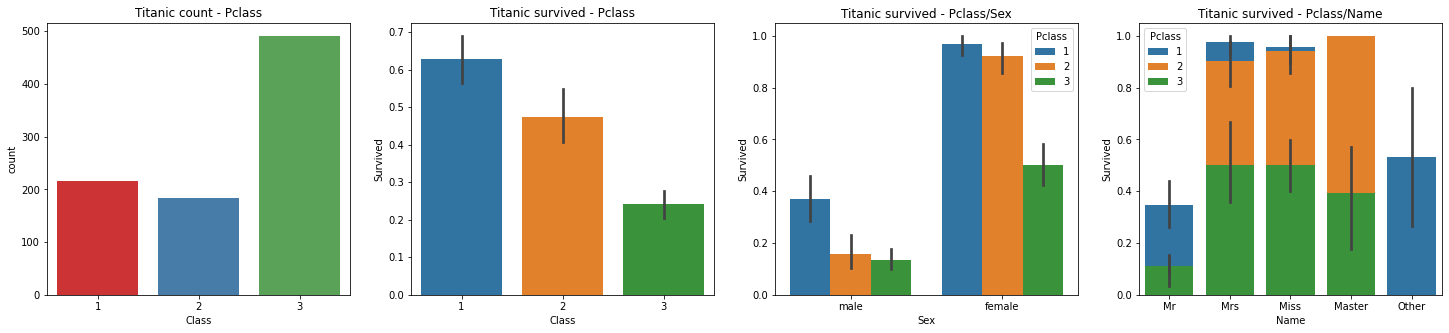

In [182]:
# Pclass 관련 그래프 4개 생성
fig = plt.figure(figsize=(25, 5))
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

# Pclass 별 몇 명이 있는지
sns.countplot(x='Pclass', palette='Set1', data=train, ax=ax1)
# Pclass 별 얼마나 살아남았는지
sns.barplot(x='Pclass',y='Survived', data=train, ax=ax2)
# Sex, Pclass 별 얼마나 살아남았는지
sns.barplot(x='Sex',y='Survived', hue='Pclass', data=train, ax=ax3)
# Name, Pclass 별 얼마나 살아남았는지
sns.barplot(x='Title',y='Survived', hue='Pclass', dodge=False, data=train, ax=ax4)

ax1.set_title('Titanic count - Pclass')
ax1.set_xlabel('Class')

ax2.set_title('Titanic survived - Pclass')
ax2.set_xlabel('Class')

ax3.set_title('Titanic survived - Pclass/Sex')

ax4.set_title('Titanic survived - Pclass/Name')
ax4.set_xlabel('Name')

plt.show()

### 1. 타이타닉 호에는 Class 3등급 > 1등급 > 2등급 순으로 승객이 많았음
### 2. Class 1등급 승객이 생존률이 가장 높고 다음은 2등급, 3등급은 가장 생존률이 낮았음/ 
### * Class가 높은 승객일수록 생존률 높음
### 3. 여성이 남성보다 생존률 높음 / 같은 성별 내에서는 Class가 높으면 생존률 높음
### 4. Mrs, Miss, Master는 1등급이 적고 3등급이 많았으나 생존률이 높았고 Mr와 Other에는 1등급이 많았으나 생존률이 높지 않았음 / Mr 생존률이 가장 낮음

### < Pclass와 Age의 관계성 >

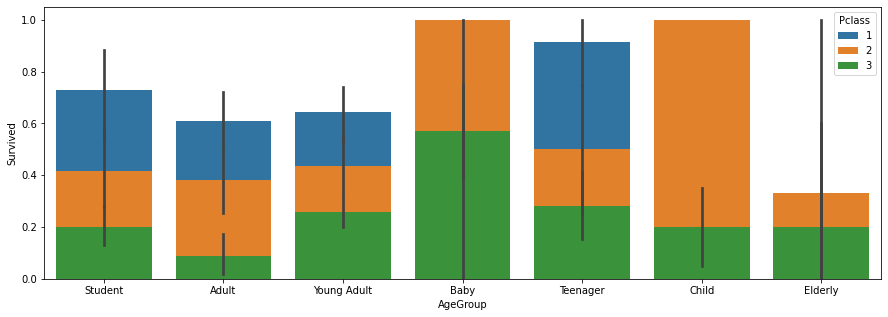

In [183]:
fig = plt.figure(figsize=(15, 5))
sns.barplot(x="AgeGroup", y="Survived", hue="Pclass", dodge=False, data=train)  # AgeGroup, pclass별 생존률
plt.show()

### 1. 주로 나이가 어린 그룹(Baby, Teenager, Child)이 생존률이 높았다.
### 2. Baby, Child는 1등급이 없었음에도 생존확률이 가장 높았다.
### 3. 나이가 가장 많은 그룹 Elderly의 생존확률이 가장 낮았고 1등급 승객이 없었다.
### * 생존률에 class에 대한 영향보다 age에 대한 영향이 더 크다


## 2. Sex

### < Sex와 생존률의 관계성 >

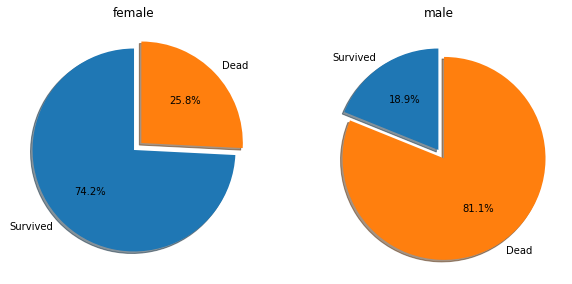

In [184]:
labels = 'Survived', 'Dead'     # 생존 유무 라벨링
# female 중 살거나(1) 죽은 사람(0) 수
sizes_f = [len(train.loc[ (train["Sex"]=='female') & (train["Survived"]==1)]), \
         len(train.loc[ (train["Sex"]=='female')& (train["Survived"]==0)]) ]
# male 중 살거나(1) 죽은 사람(0) 수
sizes_m = [len(train.loc[ (train["Sex"]=='male') & (train["Survived"]==1)]), \
         len(train.loc[ (train["Sex"]=='male')& (train["Survived"]==0)]) ]

explode = (0, 0.1) # 그래프에서 값 사이 간격

fig = plt.figure()  # 그래프 그리기
fig.set_size_inches(10,5)   # 그래프 크기
ax1 = fig.add_subplot(1,2,1) # subplot 2개 만들기
ax2 = fig.add_subplot(1,2,2)

ax1.pie(sizes_f, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)  # 파이차트로 female % 구하기, 소수점 첫째자리까지
ax1.set_title('female')

ax2.pie(sizes_m, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)  # 파이차트로 male % 구하기
ax2.set_title('male')

plt.show()

### * 여성의 생존률이 남성의 생존률보다 높음

## 3. Age

### < Age와 생존률의 관계성 >

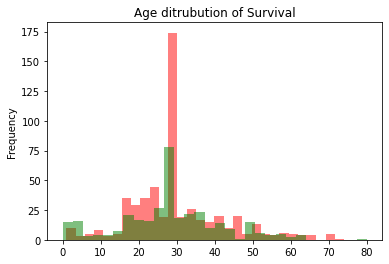

In [185]:
train[train["Survived"]==0]["Age"].plot.hist(bins=30, color='r', alpha=0.5)     # train data에서 Age별로 죽은 사람을 빨간색으로 표시, alpha는 투명도
train[train["Survived"]==1]["Age"].plot.hist(bins=30, color='g', alpha=0.5)     # train data에서 Age별로 산 사람을 빨간색으로 표시, alpha는 투명도
plt.title('Age ditrubution of Survival')                                        # 그래프 title 설정
plt.show()

### * 5세 이하의 생존률이 가장 높음

대부분의 나이대에서 생존률보다 사망률이 더 높음

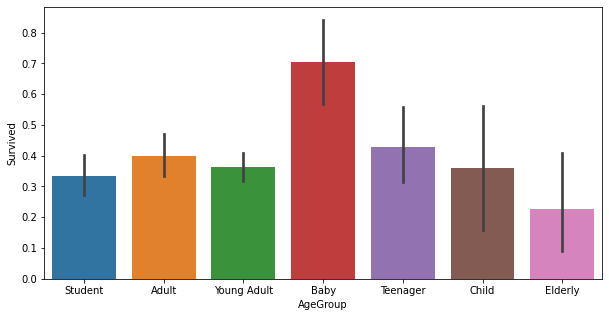

In [186]:
fig = plt.figure(figsize=(10, 5))
sns.barplot(x="AgeGroup", y="Survived", data=train)   # train data에 AgeGroup별로 생존비율 비교
plt.show()

### * Baby가 가장 많이 살아남았으며 Elderly가 가장 적게 살아남음
### 주로 나이가 어릴수록 생존률이 높은 경향, 나이가 많을수록 사망률 높음

#[ 모델 설계 및 학습 ]

In [187]:
# PassengerId는 승객들 연번에 불과하므로 학습에서 제외 / Survived는 결과에 해당하므로 학습에서 제외 / Survived는 target에 저장
# train과 test data에 있는 카테고리 feature를 One-hot-encoding 시켜 카테고리별로 0, 1로 전환
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train_label = train['Survived']                     # target은 Survived로 지정
train_data = train.drop('Survived', axis=1)         # train data에서 Survived 삭제
test_data = test.drop("PassengerId", axis=1).copy() # test_data에서 PassengerId 삭제

In [188]:
# scikit-learn 라이브러리 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from sklearn.utils import shuffle

In [189]:
# 학습시키기 전에 train data, train_target 섞어주기
train_data, train_label = shuffle(train_data, train_label, random_state = 0)

In [190]:
def train_and_test(model):              # model 별 학습, 예측, score 출력 함수
    model.fit(train_data, train_label)  # train data로 학습
    prediction = model.predict(test_data)   # 모델별 예측
    accuracy = round(model.score(train_data, train_label) * 100, 2) # train_data의 score를 소숫점 둘째자리까지 %로 표시
    print("Accuracy : ", accuracy, "%")
    return prediction    # 예측값 리턴

In [191]:
# 각종 모델들

# Logistic Regression
log_pred = train_and_test(LogisticRegression())
# SVM
svm_pred = train_and_test(SVC())
# KNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
# Navie Bayes
nb_pred = train_and_test(GaussianNB())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy :  80.92 %
Accuracy :  76.54 %
Accuracy :  84.74 %
Accuracy :  88.78 %
Accuracy :  79.01 %


### * test data로 score를 매겼을 때 

### Random Forest > KNN > Logistic Regression > Navie Bayes > SVM 순으로 Score가 높았음

In [192]:
submission = pd.read_csv('titanic/gender_submission.csv')    # 실제 정답
def final_accuracy(model):
    final_accuracy = round(accuracy_score(model, submission['Survived'])*100, 2)  # 실제 정답과 모델 별 score 출력
    print("Final_accuracy : ", final_accuracy, "%")

final_accuracy(log_pred) # Logistic Regression
final_accuracy(svm_pred) # SVM
final_accuracy(knn_pred_4) # KNN
final_accuracy(rf_pred) # Random Forest
final_accuracy(nb_pred) # Navie Bayes

Final_accuracy :  96.89 %
Final_accuracy :  76.79 %
Final_accuracy :  85.89 %
Final_accuracy :  71.77 %
Final_accuracy :  94.02 %


### * 실제 정답인 gender_submission으로 score를 매겼을 때
### Logistic Regression > Navie Bayes > KNN > SVM > Random Forest 순으로 Score가 높았음

In [193]:
submission['Survived'] = log_pred
submission.to_csv("log_pred.csv", index=False)

submission['Survived'] = svm_pred
submission.to_csv("svm_pred.csv", index=False)

submission['Survived'] = knn_pred_4
submission.to_csv("knn_pred_4.csv", index=False)

submission['Survived'] = rf_pred
submission.to_csv("rf_pred.csv", index=False)

submission['Survived'] = nb_pred
submission.to_csv("nb_pred.csv", index=False)

### * 모델별 submission csv파일 생성